In [1]:
%pylab inline
from scipy.stats import norm
from scipy.integrate import quad
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


# Capacity Symmetric 1D 

In [3]:
SmatF=np.load("Capacity-Symmetric-Full-1D/Smat.npy")
SmatD=np.load("Capacity-Symmetric-Diluted-1D/Smat.npy")
X=np.load("Capacity-Symmetric-Diluted-1D/X.npy")

In [4]:
L=np.logspace(1,3,10)
alphasF=[]
alphasD=[]
sp=[]
for l in range(len(L)):
    sp.append(1.0/float(L[l]))
    alphasF.append(1.0/min(SmatF[l].flatten()))
    alphasD.append(1.0/min(SmatD[l].flatten()))

[0.0005, 0.1, 0.01, 0.2]

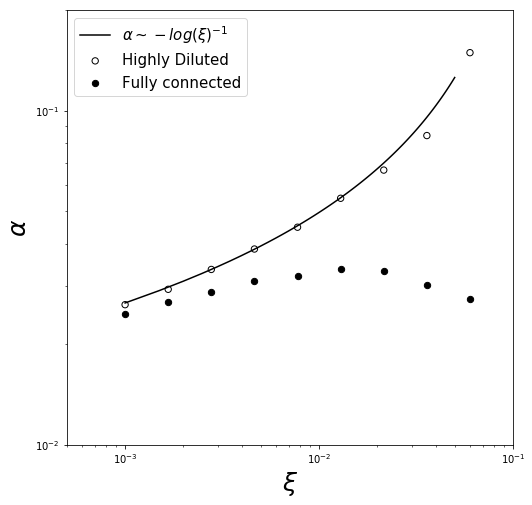

In [7]:
def i1(x):
    y=7*x
    return -0.132/(log(y))
x=linspace(0.001,0.05,100)
figure(figsize=(8,8))
scatter(asarray(sp[1:]),asarray(alphasD[1:]),s=40, facecolors='none', edgecolors='k',label="Highly Diluted")
scatter(sp[1:],asarray(alphasF[1:])*1.23,s=40,c='k',label="Fully connected")
plot(x,i1(x),c='k',label=r"$\alpha \sim -log(\xi)^{-1}$")
xscale("log")
yscale("log")
xlabel(r"$\xi$",fontsize=25)
ylabel(r"$\alpha$",fontsize=25)
legend(fontsize=15,loc='upper left')
axis([0.0005,0.1,0.01,0.2])

# Capacity 1D asymmetric, $L=60$

In [15]:
gammas=load("Capacity-asymmetric-L60/gammas.npy")
Smat=load("Capacity-asymmetric-L60/Smat.npy")
us=load("Capacity-asymmetric-L60/corrected_u.npy")
uraws=load("Capacity-asymmetric-L60/raw_u.npy")
ws=load("Capacity-asymmetric-L60/wsMat.npy")
gs=load("Capacity-asymmetric-L60/gs.npy")
deltax=load("Capacity-asymmetric-L60/Deltas.npy")

In [16]:
def K(x,x1,gamma,L):
    d=(x-x1)
    if d>float(L/2.0):
        d=d-L
    if d<float(-L/2.0):
        d=d+L
    return exp(-abs(d))+gamma*np.sign(d)*np.exp(-abs(d)) #    return gamma*np.sign(d)*np.exp(-abs(d)) #

In [17]:
alphas=[]
for i in range(len(Smat)):
    alphas.append(1.0/Smat[i][0][0])

res=10000
xs=linspace(-30,30,res)
Dr=1.0/res
L=60
var=[]
for gamma in gammas:
    k=[]
    for x in xs:
        k.append(K(x,0,gamma,L))
    var.append(sum(pow(asarray(k),2))*Dr)


Text(0.5,0,'$\\gamma$')

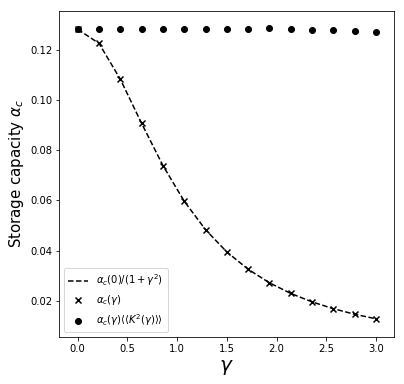

In [19]:
L=60
figure(figsize(6,6))
plot(gammas,(alphas[0]/(L*asarray(var[0])))/(1+pow(gammas,2)),linestyle="--",c="k",label=r"$\alpha_{c}(0)/(1+\gamma^{2})$")
scatter(gammas,asarray(alphas)/(L*asarray(var)),c="k", marker="x",label=r"$\alpha_{c}(\gamma)$")
scatter(gammas,asarray(alphas)/(L*var[0]),c="k",label=r"$\alpha_{c}(\gamma)\langle \langle K^{2}(\gamma)\rangle\rangle$")
legend()
ylabel(r"Storage capacity $\alpha_{c}$",fontsize=15)
xlabel(r"$\gamma$",fontsize=20)
#savefig("capacity_approximation.eps")

# Asymmetric capacity approximation

In [3]:
SmatF=np.load("Capacity-Symmetric-Full-1D/Smat.npy")
SmatD=np.load("Capacity-Symmetric-Diluted-1D/Smat.npy")
X=np.load("Capacity-Symmetric-Diluted-1D/X.npy")

In [4]:
L=np.logspace(1,3,10)
alphasF=[]
alphasD=[]
sp=[]
for l in range(len(L)):
    sp.append(1.0/float(L[l]))
    alphasF.append(1.0/min(SmatF[l].flatten()))
    alphasD.append(1.0/min(SmatD[l].flatten()))

In [8]:
sp1=sp[2:]
gammas=linspace(0,3,10)
alphasD0=alphasD[2:]
alphasD1=np.zeros((len(alphasD0),len(gammas)))
for i in range(len(alphasD0)):
    for j in range(len(gammas)):
        alphasD1[i][j]=alphasD0[i]/(1+pow(gammas[j],2))

Text(0.5,0,'Storage capacity $\\alpha_{c}$')

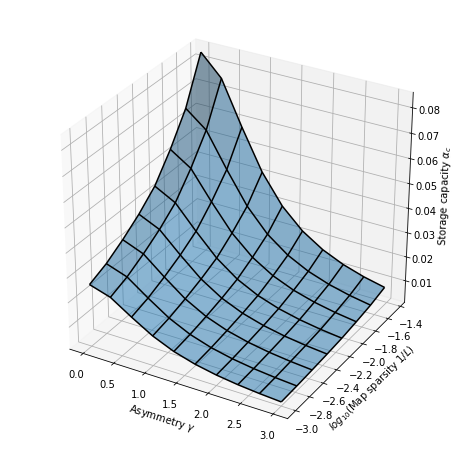

In [10]:
from mpl_toolkits.mplot3d import Axes3D

X,Y=meshgrid(gammas,log10(asarray(sp1)))
Z=alphasD1
fig=figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z,alpha=0.5)
ax.plot_wireframe(X, Y, Z,color="k")
ax.set_xlabel(r"Asymmetry $\gamma$",fontsize=10)
ax.set_ylabel(r"$log_{10}$(Map sparsity $1/L$)",fontsize=10)
ax.set_zlabel(r"Storage capacity $\alpha_{c}$",fontsize=10)

#ax.yaxis.set_scale('log')
#savefig("capacity_analytic.eps")